# 第3章 （4）最小二乗法のパラメータを最急降下法で最適化する
## 最急降下法で求める

まず，データを生成する．

下記の式に，ノイズとして正規乱数（平均0．0，標準偏差0.5）が付加されてデータが生成されていると仮定する．

$$
 f(x)=0.7x+1.2
$$

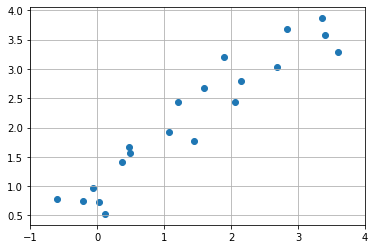

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 目的関数
def mathfunc(x):
    y = 0.7*x+1.2
    return y

# 定義域（xの範囲: -1.0から4.0）
# 生成するデータの個数は20個
xmin = -1.0
xmax = 4.0
num = 20

# 乱数の種を設定
np.random.seed(5)

# ランダムにxを生成
x = (xmax - xmin) * np.random.rand(num) + xmin

# ｘからｙを生成する．
y = mathfunc(x)

# yにノイズ（正規乱数（平均0．0， 標準偏差0.5））を加える．
y += np.random.normal(loc=0.0, scale=0.5, size=num)


# pandasを使ってDataFrameにする
array = np.array([x,y])
import pandas as pd
df = pd.DataFrame(array.T, columns=['x','y'])
df = df.sort_values('x')

# グラフ表示
plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

最小二乗法の目的関数を作成する．

求めたい多項式  

$$
\begin{align}
f(x) &= a x + b
\end{align}
$$

目的関数  
$$
J(a,b) = \frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - f(x_\alpha)\right)^2
$$

目的関数のグラフを描いてみよう．
まず，目的関数を展開する．
$$
\begin{align}
J(a,b) &= \frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - f(x_\alpha)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - (ax_\alpha+b)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha^2 - 2y_\alpha(ax_\alpha+b)+(ax_\alpha+b)^2\right)\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha^2 - 2ax_\alpha y_\alpha-2by_\alpha + a^2x_\alpha^2+2abx_\alpha+b^2\right)\\
&=\frac{1}{2}\left\{\sum_{\alpha=1}^N y^2-2a\sum_{\alpha=1}^N x_\alpha y_\alpha -2b \sum_{\alpha=1}^N y_\alpha + a^2 \sum_{\alpha=1}^N x_\alpha ^2 + 2ab \sum_{\alpha=1}^N x_\alpha + b^2 \sum_{\alpha=1}^N 1\right\}\\
\end{align}
$$

In [66]:
# データからΣのところを求める．

print(sum(df.y**2))
print(sum(df.x*df.y)*2)
print(sum(df.y)*2)
print(sum(df.x**2))
print(sum(df.x)*2)
print(len(df.x))

115.31961082284775
171.778873037097
86.13927091200374
71.64662401762588
55.788229864823506
20


よって，目的関数は，
$$
J(a,b) = \frac{1.0}{2.0}\left(115.32-171.78a-86.14b+71.65a^2+55.79ab+20b^2\right)
$$

gnuplotでは以下のように入力する. 
```
splot[-10:10][-10:10] (1.0/2.0)*(115.32-171.78*x-86.14*y+71.65*x**2+55.79*x*y+20*y**2)
```

これをグラフに表示すると，以下のようになる．
![title](./img/obj1.gif)
![title](./img/obj2.gif)

関数は確かに下に凸のグラフで，最小値をとるa,bを求めることができそうである．

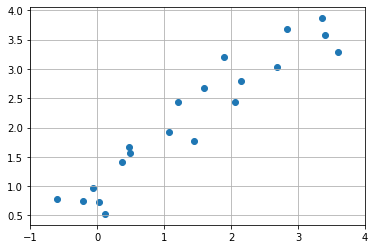

In [62]:
# グラフ表示
plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

[0.78857557 1.05365089]


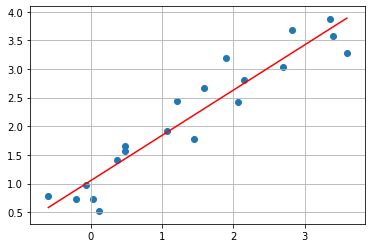

In [63]:
# ライブラリを使って最小二乗法を行う．
plt.plot(df.x, np.poly1d(np.polyfit(df.x, df.y, 1))(df.x),color='red')
print(np.polyfit(df.x, df.y, 1))
plt.scatter(df.x, df.y) # 散布図
plt.grid(True)

更新回数= 97
a= 0.7881447231750077
b= 1.0546229437888595


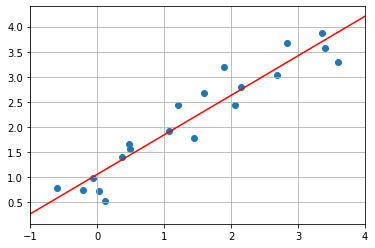

In [64]:
# 最急降下法を用いて，最小二乗法を行う

# 目的関数の偏微分:a
def ｄerivative_a(a, b):
    z =  sum((df.y-a*df.x-b)*(-df.x))
    return z

# 目的関数の偏微分:b
def derivative_b(a, b):
    z =  sum((df.y-a*df.x-b)*(-1))
    return z

# 最急降下法で目的関数の最小値をとるパラメータを求める．
eta = 0.01
a = 10
b =10

# 終了条件
epsilon = 0.0001
old_para_a = a
old_para_b = b

ct = 0
for i in range(1000):
    # 更新式
    a = a - eta*derivative_a(a, b)
    b = b - eta*derivative_b(a, b)
    #print('a={:.2f}'.format(a), 'b={:.2f}'.format(b))
    if abs(old_para_a-a)<epsilon and abs(old_para_b-b)<epsilon :
        break

    old_para_a = a
    old_para_b = b

    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)
print('b=', b)


#
# 最急降下法で求めたパラメータを使って，グラフ表示
#
def mathfunc(x):
    y = a*x+b
    return y

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.0
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y, color='red') # 求めた直線
plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()
